# Representation Learning and Generative Learning Using Autoencoders and GANs

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Autoencoders

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from sklearn.manifold import TSNE

### Performing PCA

build 3d data

In [3]:
np.random.seed(4)


def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data


X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

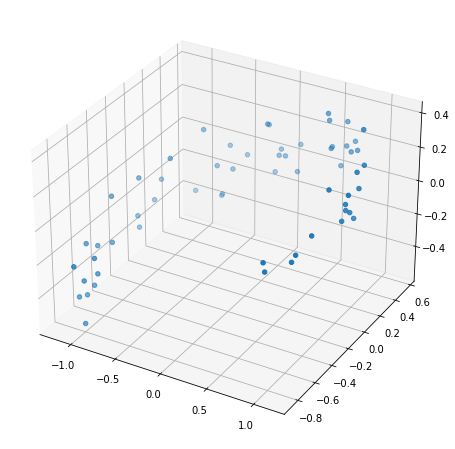

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2])

In [5]:
encoder = Sequential([
    layers.Dense(2, input_shape=(3,))
])
decoder = Sequential([
    layers.Dense(3, input_shape=(2,))
])
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.1))

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=20)
codings = encoder.predict(X_train)

Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3434
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3173
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2968
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2792
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2637
Epoch 6/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2509
Epoch 7/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2383
Epoch 8/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2278
Epoch 9/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2168
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2070
Epoch 11/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1973
Epoch 12/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1884
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.

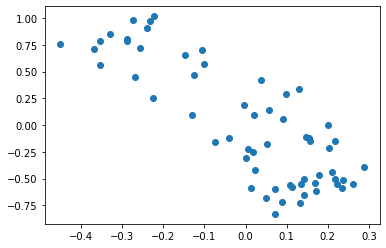

In [7]:
plt.scatter(codings[:, 0], codings[:, 1])

### Stacked Autoencoders

MNIST dataset

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [9]:
stacked_encoder = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='selu'),
    layers.Dense(30, activation='selu'),
])
stacked_decoder = Sequential([
    layers.Dense(100, activation='selu', input_shape=(30,)),
    layers.Dense(28 * 28, activation='sigmoid'),
    layers.Reshape((28, 28))
])
stacked_ae = Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(learning_rate=1.5))
history = stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3357 - val_loss: 0.3138
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3048 - val_loss: 0.3060
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2985 - val_loss: 0.2972
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2943 - val_loss: 0.2943
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2917 - val_loss: 0.2915
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2900 - val_loss: 0.2906
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2885 - val_loss: 0.2904
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2874 - val_loss: 0.2893
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2865 - val_loss: 0.2871
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.285

#### Visualizing the reconstructions

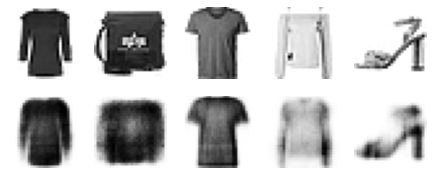

In [10]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])


show_reconstructions(stacked_ae)

In [11]:
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

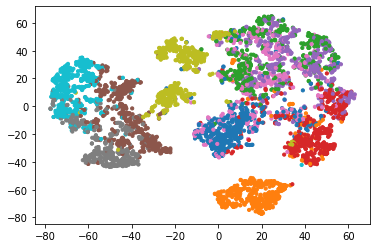

In [12]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap='tab10')

### Tying Weights

In [13]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros",
                                      shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)

    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [14]:
dense_1 = layers.Dense(100, activation="selu")
dense_2 = layers.Dense(30, activation="selu")
tied_encoder = Sequential([
    layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])
tied_decoder = Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    layers.Reshape([28, 28])
])
tied_ae = Sequential([tied_encoder, tied_decoder])
tied_ae.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(learning_rate=1.5))
history = tied_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3287 - val_loss: 0.3046
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2984 - val_loss: 0.2948
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2922 - val_loss: 0.2925
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2889 - val_loss: 0.2910
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2867 - val_loss: 0.2917
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2852 - val_loss: 0.2850
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2840 - val_loss: 0.2853
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2831 - val_loss: 0.2849
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2824 - val_loss: 0.2833
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.281

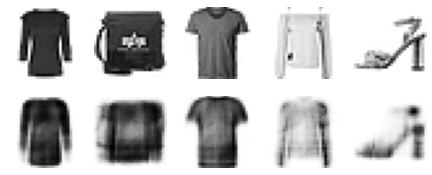

In [15]:
show_reconstructions(tied_ae)

### Convolutional Autoencoders

In [16]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [17]:
conv_encoder = Sequential([
    layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    layers.MaxPool2D(pool_size=2)
])
conv_decoder = Sequential([
    layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                           input_shape=[3, 3, 64]),
    layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    layers.Reshape([28, 28])
])
conv_ae = Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3027 - rounded_accuracy: 0.9178 - val_loss: 0.2828 - val_rounded_accuracy: 0.9378
Epoch 2/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2759 - rounded_accuracy: 0.9411 - val_loss: 0.2737 - val_rounded_accuracy: 0.9455
Epoch 3/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2712 - rounded_accuracy: 0.9457 - val_loss: 0.2706 - val_rounded_accuracy: 0.9483
Epoch 4/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2688 - rounded_accuracy: 0.9482 - val_loss: 0.2696 - val_rounded_accuracy: 0.9485
Epoch 5/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2671 - rounded_accuracy: 0.9499 - val_loss: 0.2669 - val_rounded_accuracy: 0.9520


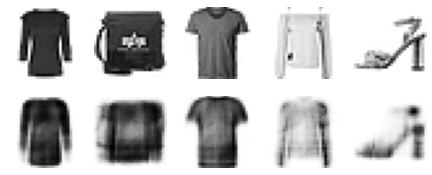

In [18]:
show_reconstructions(tied_ae)

### Denoising Autoencoders

In [19]:
dropout_encoder = Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dropout(0.5),
    layers.Dense(100, activation="selu"),
    layers.Dense(30, activation="selu")
])
dropout_decoder = Sequential([
    layers.Dense(100, activation="selu", input_shape=[30]),
    layers.Dense(28 * 28, activation="sigmoid"),
    layers.Reshape([28, 28])
])
dropout_ae = Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3548 - rounded_accuracy: 0.8727 - val_loss: 0.3194 - val_rounded_accuracy: 0.9048
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3184 - rounded_accuracy: 0.9029 - val_loss: 0.3118 - val_rounded_accuracy: 0.9097
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3124 - rounded_accuracy: 0.9080 - val_loss: 0.3065 - val_rounded_accuracy: 0.9160
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3089 - rounded_accuracy: 0.9107 - val_loss: 0.3042 - val_rounded_accuracy: 0.9157
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3065 - rounded_accuracy: 0.9127 - val_loss: 0.3036 - val_rounded_accuracy: 0.9158
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3047 - rounded_accuracy: 0.9142 - val_loss: 0.3002 - val_rounded_accuracy: 0.9205
Epoch 7/10
1719/1719 [==================

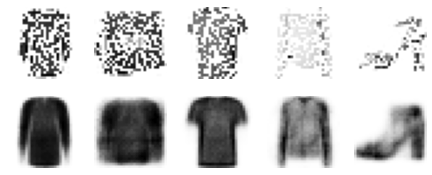

In [20]:
dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))

## GANs

In [21]:
from utils.plots import plot_multiple_images

In [22]:
codings_size = 30

generator = Sequential([
    layers.Dense(100, activation="selu", input_shape=[codings_size]),
    layers.Dense(150, activation="selu"),
    layers.Dense(28 * 28, activation="sigmoid"),
    layers.Reshape([28, 28])
])

discriminator = Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(150, activation="selu"),
    layers.Dense(100, activation="selu"),
    layers.Dense(1, activation="sigmoid")
])

gan = Sequential([generator, discriminator])

In [23]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [24]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [25]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f'Epoch {epoch + 1}/{n_epochs}')
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)

            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)
        plt.show()

Epoch 1/1


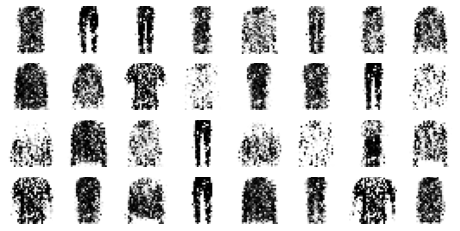

In [26]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)